In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

# To visualize the data
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.base.tsa_model import get_prediction_index
from sklearn import metrics


In [3]:
df = pd.read_csv("historic_demand_2009_2023_noNaN.csv")
df

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248079,2023-03-12 21:30:00,44,21:30:00,26841,27886,24414,2423,6545,0,13080,0,239,1490,992,1049,-206,0,938,0
248080,2023-03-12 22:00:00,45,22:00:00,25249,26286,22872,2437,6545,0,13080,0,365,1017,987,1051,-72,0,783,0
248081,2023-03-12 22:30:00,46,22:30:00,23799,24844,21449,2451,6545,0,13080,0,296,985,974,1048,-149,0,757,0
248082,2023-03-12 23:00:00,47,23:00:00,22139,24005,19923,2585,6545,0,13080,0,1043,833,521,635,-144,70,-79,0


In [4]:
df.shape


(248084, 19)

In [5]:

df['settlement_date'] = pd.to_datetime(df['settlement_date']).dt.date


In [6]:
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248079,2023-03-12,44,21:30:00,26841,27886,24414,2423,6545,0,13080,0,239,1490,992,1049,-206,0,938,0
248080,2023-03-12,45,22:00:00,25249,26286,22872,2437,6545,0,13080,0,365,1017,987,1051,-72,0,783,0
248081,2023-03-12,46,22:30:00,23799,24844,21449,2451,6545,0,13080,0,296,985,974,1048,-149,0,757,0
248082,2023-03-12,47,23:00:00,22139,24005,19923,2585,6545,0,13080,0,1043,833,521,635,-144,70,-79,0


In [7]:
df_uk = df.groupby('settlement_date')['nd'].sum().to_frame()

In [8]:
df_uk

,nd
settlement_date,
2009-01-01,1789321
2009-01-02,1920721
2009-01-03,1897691
2009-01-04,1911407
2009-01-05,2181646
...,...
2023-03-08,1654428
2023-03-09,1632729
2023-03-10,1547783


In [9]:
df_uk_monthly = df_uk.resample('M').mean()

In [10]:
train = df_uk_monthly[(df_uk_monthly.index.get_level_values(0) >= '2009-01-31') & 
                      (df_uk_monthly.index.get_level_values(0) < '2022-11-30')]

test = df_uk_monthly[(df_uk_monthly.index.get_level_values(0) >= '2022-11-30')]
len(test)

5

In [11]:
result = adfuller(df_uk_monthly['nd'])
result

(0.029664759949011917,
 0.9609176584066806,
 11,
 159,
 {'1%': -3.472161410886292,
  '5%': -2.8798954259680936,
  '10%': -2.5765565828092245},
 3874.438979427897)

In [12]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 0.029665
p-value: 0.960918


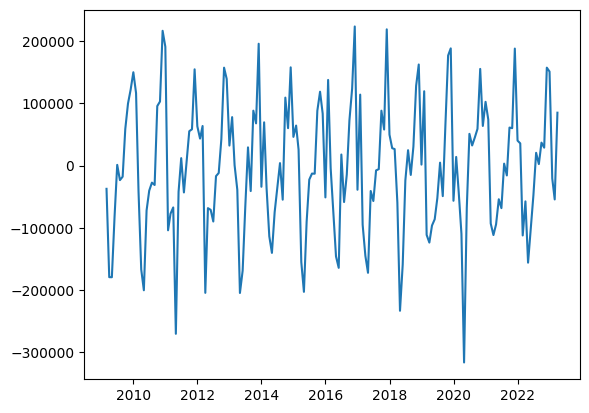

In [13]:
plt.plot(df_uk_monthly['nd'].diff())

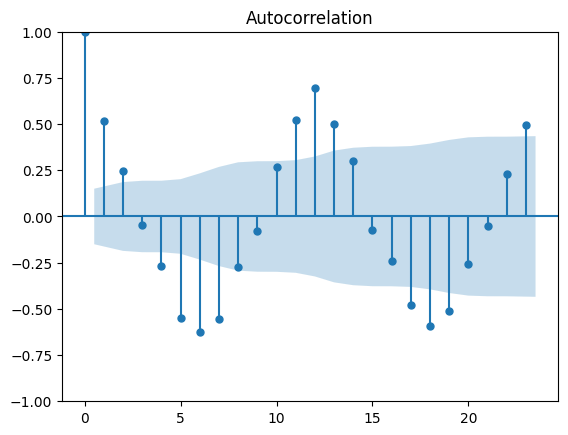

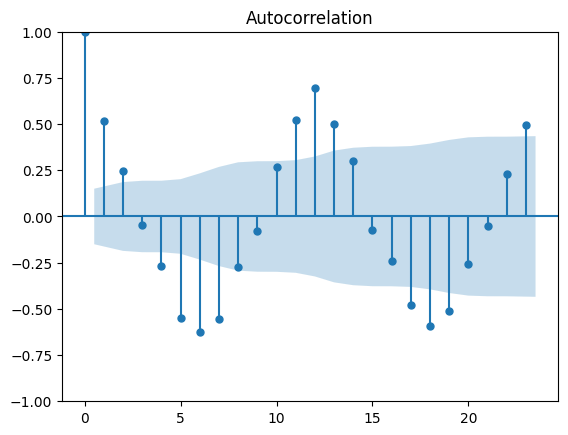

In [14]:
plot_acf(df_uk_monthly['nd'].diff().dropna())

In [15]:
result_difference1 = adfuller(df_uk_monthly['nd'].diff().dropna())
result_difference1[1]
#d=1

1.3880257757260044e-18

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


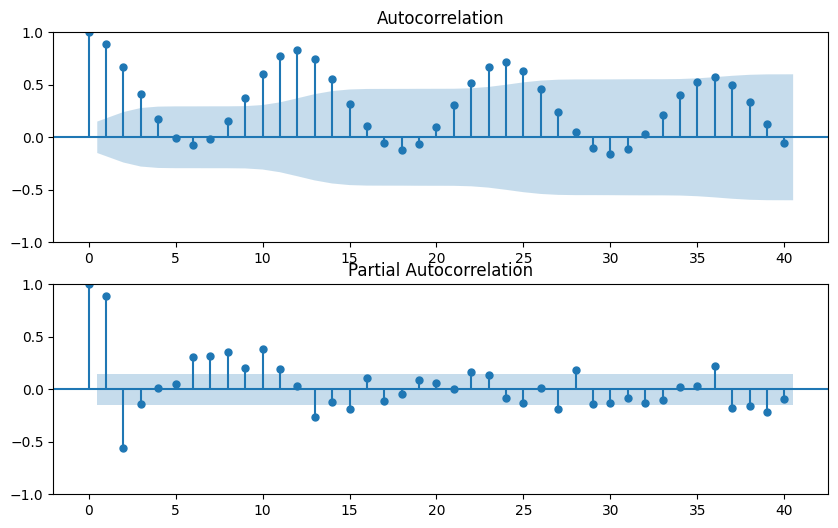

In [16]:
fig, ax = plt.subplots(nrows=2, figsize=(10,6))
plot_acf(df_uk_monthly['nd'], lags=40, ax=ax[0])
plot_pacf(df_uk_monthly['nd'], lags=40, ax=ax[1])
plt.show()
#p = 7/3
#q = 1/2

In [17]:
modelArimaNewParam = ARIMA(train['nd'],order = (2,1,1), freq='M')

In [18]:
arimaPred_newparameters = modelArimaNewParam.fit()
#forecast_Arima_dfmonthly = modelArimaNewParam.predict(start = '2020-06-30', end = '2020-10-31',params=newparams)
forecast_Arima_dfmonthly = arimaPred_newparameters.forecast(steps=5)
#forecast_Arima_dfmonthlyPD = pd.DataFrame(forecast_Arima_dfmonthly[0],index = test.index )
forecast_Arima_dfmonthlyPD = forecast_Arima_dfmonthly.to_frame(name = 'Prediction' )
forecast_Arima_dfmonthlyPD

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Prediction
2022-11-30,1.202045e+06
2022-12-31,1.211689e+06
2023-01-31,1.217616e+06
2023-02-28,1.221330e+06
2023-03-31,1.223682e+06


In [19]:
np.sqrt(np.sum(((forecast_Arima_dfmonthlyPD['Prediction'] - test['nd']) / test['nd'])**2)) / 5

0.07252487042042097

SARIMA Model We have the following paramters
1. p,d,q
2. seasonal P, D, Q.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


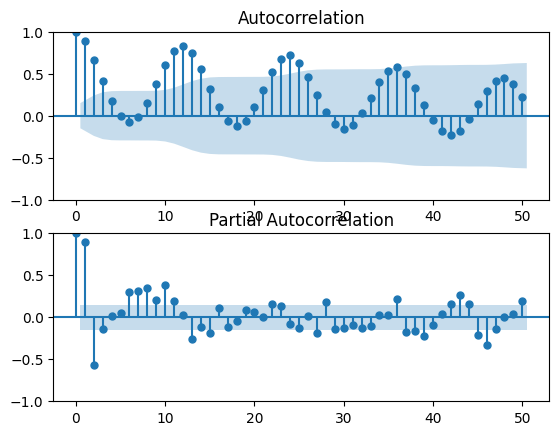

In [20]:
fig, ax = plt.subplots(2,1)
fig = plot_acf(df_uk_monthly['nd'], lags=50, ax=ax[0])
fig = plot_pacf(df_uk_monthly['nd'], lags=50, ax=ax[1])
plt.show()

# p and P = 1 spike at lag 1 and repeats pattern after every 12 so seasonal variation is 1
#q and Q = 2 negative spike
#d and D = 1 differencing factor
#s = 12

In [21]:
d = 0
result = adfuller(df_uk_monthly['nd'], autolag='AIC')
while result[1] > 0.05:
    d += 1
    df_diff = np.diff(df_uk_monthly['nd'], n=d)
    result = adfuller(df_diff, autolag='AIC')
print(f'd: {d}')

d: 1


In [22]:
D = 0
result = adfuller(df_uk_monthly['nd'], autolag='AIC')
while result[1] > 0.05:
    D += 1
    df_seasonal_diff = np.diff(df_uk_monthly, n=D, axis=0)
    result = adfuller(df_seasonal_diff, autolag='AIC')
print(f'D: {D}')

D: 1


In [23]:
modelSArimaNewParam = SARIMAX(train['nd'], order=(1, 1, 1), seasonal_order=(2, 1, 0, 12))


In [24]:

results = modelSArimaNewParam.fit()
forecast_SArima_dfmonthly = results.forecast(steps=5)
forecast_SArima_dfmonthlyPD = forecast_SArima_dfmonthly.to_frame(name = 'Prediction' )
forecast_SArima_dfmonthlyPD

,Prediction
2022-11-30,1.377787e+06
2022-12-31,1.405692e+06
2023-01-31,1.438767e+06
2023-02-28,1.335865e+06
2023-03-31,1.271984e+06


In [25]:
np.sqrt(np.sum(((forecast_SArima_dfmonthlyPD['Prediction'] - test['nd']) / test['nd'])**2)) / 5

0.03585964021216704

In [27]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.9 MB/s eta 0:00:00


In [29]:
%%time
# conda install -c conda-forge pmdarima
import pmdarima as pm
# Auto Arima performs Grid Search CV Test
model = pm.auto_arima(df_uk_monthly['nd'], 
#                       Monthly basis
                      m = 12,
#                       Data is Seasonal
                      seasonal = True,
#                       P, Q starting value
                      start_p = 0,
                      start_q = 0,
                      max_order = 4,
#                       Tests seasonality and gives I or D value
                      test = 'adf',
                      error_action = 'ignore',
                      suppress_warnings = True,
#                       Performs random search
                      stepwise = True,
                      trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=4631.474, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4712.594, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4349.371, Time=2.59 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4576.609, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5361.678, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4435.751, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=4343.806, Time=4.91 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=4341.210, Time=3.10 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=4351.035, Time=1.51 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=4343.182, Time=5.23 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=4342.810, Time=3.36 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=4.07 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=4310.646, Time=6.89 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=4330.078, Time=2.53 sec
 ARIMA(2,0,0)(2,0,0)[12]

In [30]:
model.fit(train['nd'])

ARIMA(order=(5, 0, 3), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

In [31]:
forecast = model.predict(n_periods = 65, return_conf_int = True)
forecast

(2022-11-30    1.326369e+06
 2022-12-31    1.434756e+06
 2023-01-31    1.503383e+06
 2023-02-28    1.464639e+06
 2023-03-31    1.403506e+06
                   ...     
 2027-11-30    1.589136e+06
 2027-12-31    1.658638e+06
 2028-01-31    1.690284e+06
 2028-02-29    1.674133e+06
 2028-03-31    1.618540e+06
 Freq: M, Length: 65, dtype: float64,
 array([[1194934.89113835, 1457803.73706091],
        [1267526.90009954, 1601984.11771278],
        [1313333.49215877, 1693432.58432738],
        [1261134.99944881, 1668142.15189344],
        [1192483.62096536, 1614529.32455985],
        [1093399.54650386, 1522892.05338899],
        [1026559.06884075, 1459708.65888033],
        [ 969267.0626996 , 1404361.77512559],
        [ 964449.9170473 , 1401149.35765194],
        [ 984652.97298945, 1423260.9454426 ],
        [1051578.6860991 , 1493045.77838217],
        [1112345.90789803, 1557684.09716862],
        [1245266.6252743 , 1704469.21140439],
        [1331490.69662874, 1801294.11915595],
        [1

In [32]:
forecast_df = pd.DataFrame(forecast[0], index = test.index, columns = ['prediction'])
forecast_df

,prediction
settlement_date,
2022-11-30,1.326369e+06
2022-12-31,1.434756e+06
2023-01-31,1.503383e+06
2023-02-28,1.464639e+06
2023-03-31,1.403506e+06


In [33]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(forecast_df['prediction'], df_uk_monthly.tail()['nd']))/np.max(df_uk_monthly.tail()['nd'])

0.038748397855517244

In [34]:
np.sqrt(np.sum(((forecast_df['prediction'] - df_uk_monthly.tail()['nd']) / df_uk_monthly.tail()['nd'])**2)) / 5

0.017536320417739032

<Axes: xlabel='settlement_date'>

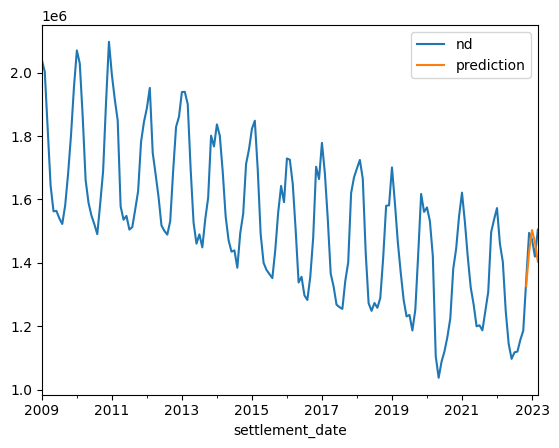

In [36]:
pd.concat([df_uk_monthly['nd'], forecast_df], axis = 1).plot()

In [37]:
forecast1 = model.predict(n_periods = 100, return_conf_int = True)
forecast1

(2022-11-30    1.326369e+06
 2022-12-31    1.434756e+06
 2023-01-31    1.503383e+06
 2023-02-28    1.464639e+06
 2023-03-31    1.403506e+06
                   ...     
 2030-10-31    1.513913e+06
 2030-11-30    1.592583e+06
 2030-12-31    1.653570e+06
 2031-01-31    1.680980e+06
 2031-02-28    1.667506e+06
 Freq: M, Length: 100, dtype: float64,
 array([[1194934.89113835, 1457803.73706091],
        [1267526.90009954, 1601984.11771278],
        [1313333.49215877, 1693432.58432738],
        [1261134.99944881, 1668142.15189344],
        [1192483.62096536, 1614529.32455985],
        [1093399.54650386, 1522892.05338899],
        [1026559.06884075, 1459708.65888033],
        [ 969267.0626996 , 1404361.77512559],
        [ 964449.9170473 , 1401149.35765194],
        [ 984652.97298945, 1423260.9454426 ],
        [1051578.6860991 , 1493045.77838217],
        [1112345.90789803, 1557684.09716862],
        [1245266.6252743 , 1704469.21140439],
        [1331490.69662874, 1801294.11915595],
        [

In [38]:
forecast_range = pd.date_range(start = '2017-11-30', periods = 100, freq = 'M')

In [39]:
forecast1_df = pd.DataFrame(forecast1[0], index = forecast_range, columns = ['prediction'])
forecast1_df

,prediction
2017-11-30,NaN
2017-12-31,NaN
2018-01-31,NaN
2018-02-28,NaN
2018-03-31,NaN
...,...
2025-10-31,1.429262e+06
2025-11-30,1.540597e+06
2025-12-31,1.621534e+06
2026-01-31,1.661245e+06


<Axes: >

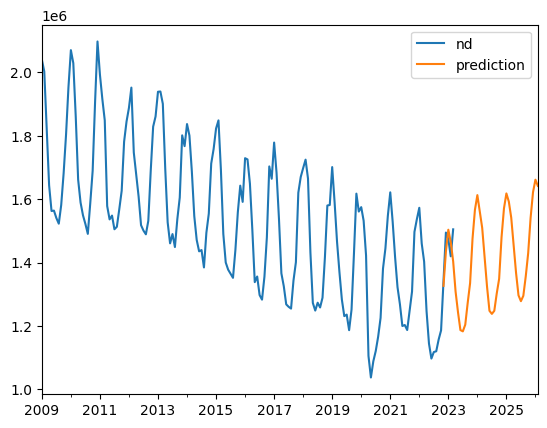

In [40]:
pd.concat([df_uk_monthly['nd'], forecast1_df], axis=1).plot()

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

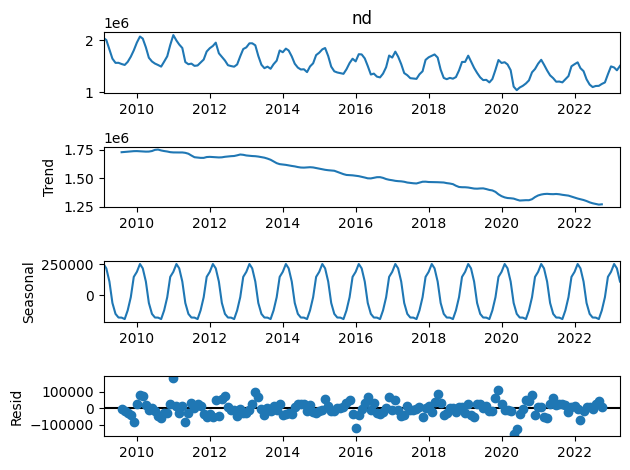

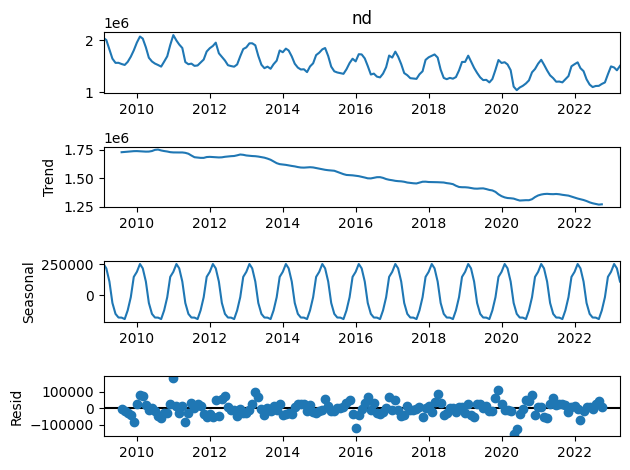

In [43]:
data = df_uk_monthly['nd']
decompose_data = seasonal_decompose(data, model="additive")
decompose_data.plot()